# Projeto Inteligência Computacional
Filipe Santos Pacheco Prates - 116011311

### Descrição do Problema

 Uma rede de hotéis possui informações de reservas passadas, e se elas foram realmente usadas pelos clientes, ou se foram canceladas. Nesse projeto usarei diferentes métodos de Inteligência Computacional para tentar predizer se o cliente irá cumprir ou não com uma reserva futura, dado os dados da reserva.

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, f1_score


### Descrição dos Dados

Os dados são originários de https://www.sciencedirect.com/science/article/pii/S2352340918315191 escrito por Nuno Antonio, Ana Almeida, and Luis Nunes para "Data in Brief, Volume 22, Fevereiro 2019".

Estão bem limpos, sem erros de escrita e pouco valores nulos.

São 32 colunas contendo informação sobre cada reserva. Dentre as quais propriedades categóricas, de Data, e numéricas.
https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [2]:
df = pd.read_csv(r'C:\Users\Filipe\Documents\Projects\Datasets\hotel_bookings.csv')
df.shape

(119390, 32)

In [3]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [4]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# df.dtypes
df.dtypes[df.dtypes=='object']

hotel                      object
arrival_date_month         object
meal                       object
country                    object
market_segment             object
distribution_channel       object
reserved_room_type         object
assigned_room_type         object
deposit_type               object
customer_type              object
reservation_status         object
reservation_status_date    object
dtype: object

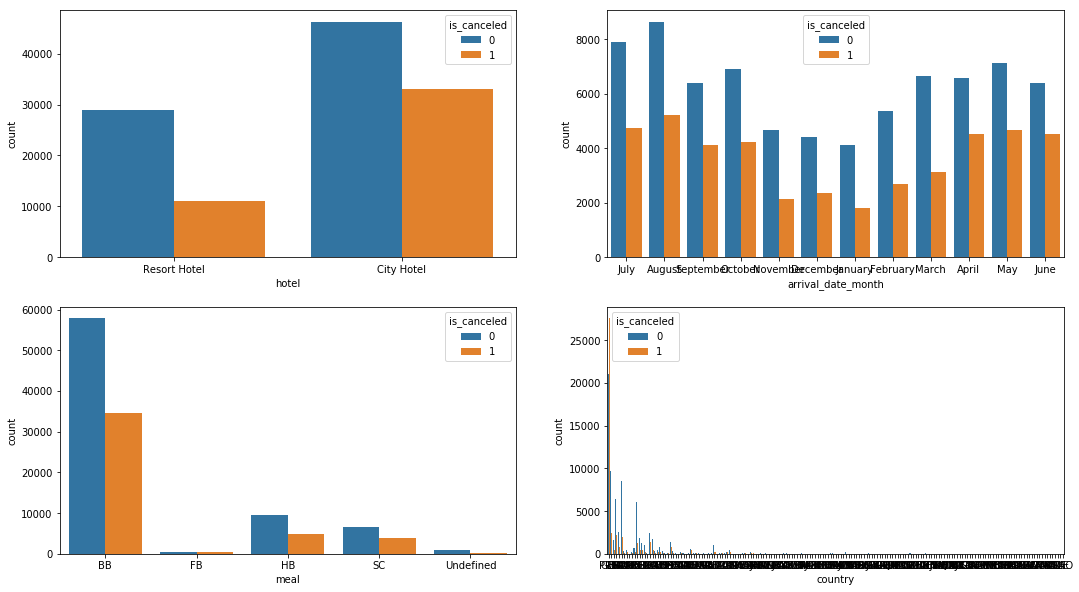

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.countplot(ax=axes[0, 0],data = df,x='hotel', hue='is_canceled')
sns.countplot(ax=axes[0, 1],data = df,x='arrival_date_month', hue='is_canceled')
sns.countplot(ax=axes[1, 0],data = df,x='meal', hue='is_canceled')
sns.countplot(ax=axes[1, 1],data = df,x='country', hue='is_canceled')


Vemos que 'country' é uma variável categórica com muitas possíveis categorias, se seguirmos com o plano de codificar as variáveis categóricas usando o One-Hot Enconding, a matriz resultante será muito esparça e não seria muito eficiente.

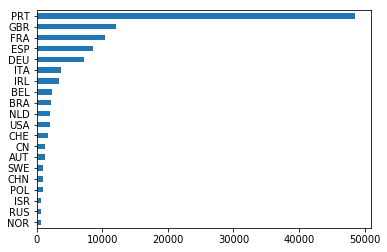

In [8]:
df['country'].value_counts()[:20].sort_values().plot(kind = 'barh')

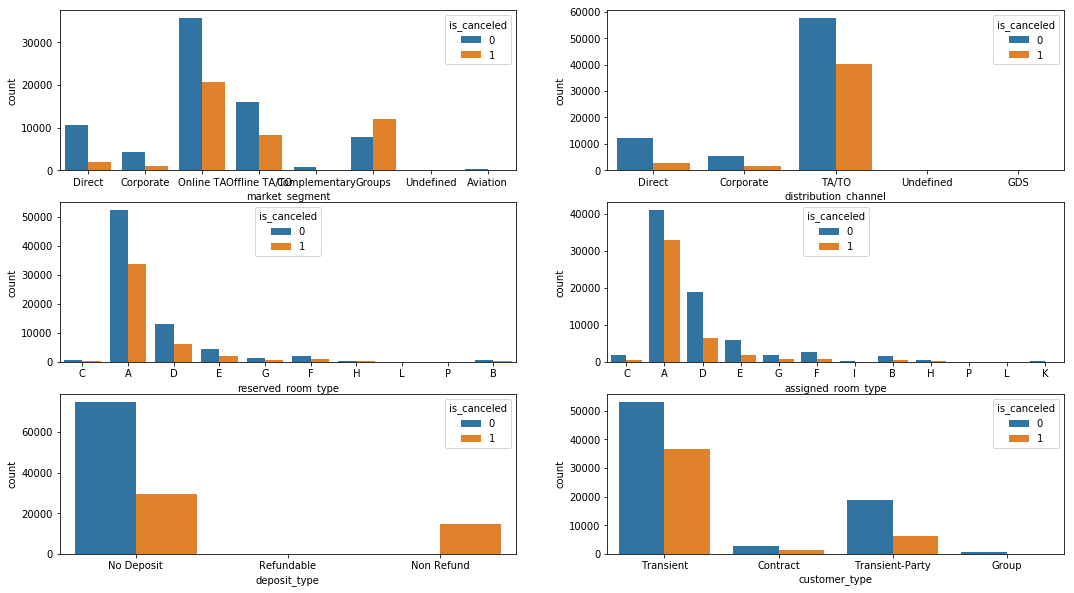

In [69]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

sns.countplot(ax=axes[0, 0],data = df,x='market_segment', hue='is_canceled')
sns.countplot(ax=axes[0, 1],data = df,x='distribution_channel', hue='is_canceled')
sns.countplot(ax=axes[1, 0],data = df,x='reserved_room_type', hue='is_canceled')
sns.countplot(ax=axes[1, 1],data = df,x='assigned_room_type', hue='is_canceled')
sns.countplot(ax=axes[2, 0],data = df,x='deposit_type', hue='is_canceled')
sns.countplot(ax=axes[2, 1],data = df,x='customer_type', hue='is_canceled')

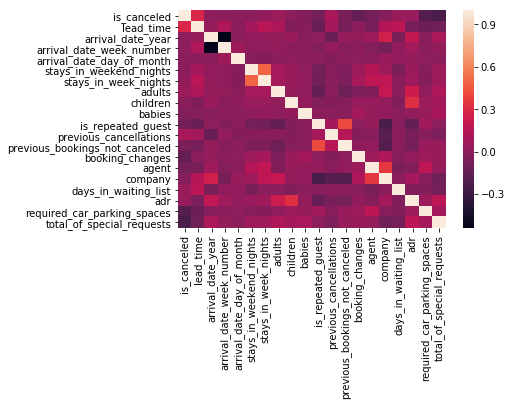

In [11]:
sns.heatmap(df.corr())

## Metodologia

Agora que fizemos um EDA na base de dados disponível para o projeto, podemos planejar uma maneira de extrair a informação contida da melhor forma para os modelos.

Primeiramente temos a questão da coluna 'country', que é a variável categórica com a maior quantidade de categorias disintas, uma ideia seria agrupar os países por continente, assim diminuindo significativamente nossa matriz de entrada nos modelos, e ainda mantante algum nível de informação da variável original. Para isso usei um dataset de países com seus códigos e seus continentes, que precisou ser limpado.


In [71]:
# continent = pd.read_csv(r'C:\Users\Filipe\Documents\Projects\Datasets\data\ccc.csv')

In [72]:
# ccmap = pd.DataFrame()
# ccmap['country'] = continent['Three_Letter_Country_Code']
# ccmap['continent'] = continent['Continent_Name']

In [73]:
# ccmap = ccmap.drop_duplicates(subset=['country'])
# ccmap.shape

(251, 2)

In [74]:
# df = pd.merge(df,ccmap, on="country", how="inner")
# df.shape

(118108, 33)

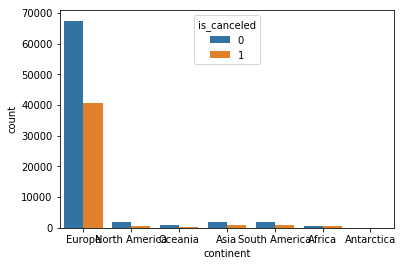

In [75]:
# sns.countplot(data = df,x='continent', hue='is_canceled')

A grande maioria dos países dos clientes são Europeus (o que faz sentido sendo os hotéis em Portugal), logo tal categorização talvez não seja tão eficaz.

In [13]:
# del df['country']
# del df['continent']

KeyError: 'continent'

Resolvido

In [9]:
mostvisited = list(df['country'].value_counts()[0:20].keys())
df['country']=df['country'].apply(lambda x: 'OTH' if x not in mostvisited else x)

In [10]:
df['agent'] = df['agent'].fillna(0)

In [11]:
mostagent = list(df['agent'].value_counts()[0:30].keys())
df['agent']=df['agent'].apply(lambda x: 'OTH' if x not in mostagent else x)

Agora que lidamos com a 'country', olhamos para as outras colunas categóricas e percebemos que podemos usar um simples One-Hot Encoding, a qual separa a coluna categórica em N colunas booleanas que indicam a presença da linha em cada uma das N categorias. 

Detalhe para as colunas 'agent' e 'company', que apesar de aparentemente numéricas, elas são na verdade categóricas, e as duas possuem uma categoria significativa que está representada como NaN. Por isso substituí todos os NaN para 0 e foi codificado como uma outra variável categórica qualquer

Erro, resolvi remover essa coluna problemática 'company'

In [12]:
# mostcompany = list(df['company'].value_counts()[0:30].plot(kind = 'barh'))
del df['company']

In [13]:
cols = ['hotel',
'arrival_date_month',
'meal',
'agent',
# 'company',
'country',
# 'continent',
'market_segment',
'distribution_channel',
'reserved_room_type',
'assigned_room_type',
'deposit_type',
'customer_type']
for col in cols:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    del df[col]

No dataset original temos o nosso "y" à ser predizido, que é a coluna "is_canceled", mas também possuimos outras colunas que são preenchidas no momento que o cliente confirma sua reserva ou não, e que contém informações diretas para a "resposta". Estas são as 'reservation_status_date' e 'reservation_status', que precisam sem removidas, já que na prática os modelos não terão essa informação de novas reservas.

In [14]:
df['reservation_status'].head(15)

0     Check-Out
1     Check-Out
2     Check-Out
3     Check-Out
4     Check-Out
5     Check-Out
6     Check-Out
7     Check-Out
8      Canceled
9      Canceled
10     Canceled
11    Check-Out
12    Check-Out
13    Check-Out
14    Check-Out
Name: reservation_status, dtype: object

In [15]:
del df['reservation_status']
del df['reservation_status_date']

Agora vamos lidar com os outros valores nulos do dataset, tirando o caso da coluna 'agent' e 'company', são poucos os casos de nulos, que podemos simplesmente remover da nossa base de dados que não terá um impacto muito grande)

In [16]:
df.isna().sum().value_counts()

0    127
4      1
dtype: int64

In [17]:
df = df.dropna()
df.head(20)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,9,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
8,1,85,2015,27,1,0,3,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
9,1,75,2015,27,1,0,3,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


Próximo passo para preparar os dados para os modelos é separar o DataFrame em input e output, e Normalizar o X.

Ao normalizar os datos temos que nenhuma coluna seja erroneamente considerada com prioridade em cima de outra devido à diferença de escala. Garantimos que todos os valores numéricos fiquem entre 0 e 1 e representem o percentil deles na distribuição de tal variável.

In [18]:
y = df['is_canceled']
X = df.drop(columns=['is_canceled'])

In [19]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

C:\Users\Filipe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Modelos Lineares

Os modelos Lineares que vou usar para esse problema de classificação é à Regressão Logística e o Naive Bayes.
Primeiramente precisamos separar nosso X e y em subBases usados para o treinamento e teste dos modelos:


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(95508, 127) (23878, 127)



### Regressão Logística
A intuição por trás de regressão logística é bastante simples: em vez de acharmos a reta que melhor se ajusta aos dados, vamos achar uma curva em formato de 'S' que melhor se ajusta aos dados.
Na prática a diferença na Regressão Logística e uma Regressão linear que tenta simplesmente achar a melhor reta que encaixa nos dados é que a Logística segue:
y=σ(Xw+ϵ)
onde σ() é uma função sigmóide. Assim temos uma maneira simples de gerar a probabilidade de uma amostra estar em um grupo, ou em outro (usando y>limiar, 0,5 por exemplo)

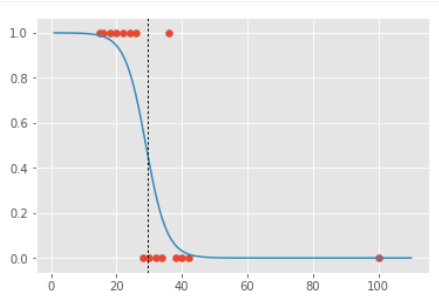

In [24]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(X_train, y_train)
logReg.score(X_test, y_test)

C:\Users\Filipe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.815897478850825

In [ ]:
cross_validate(logReg,X_train,y_train,cv=4)

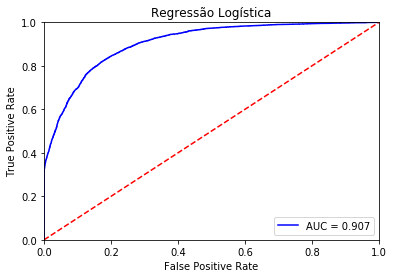

In [94]:
probs = logReg.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thrs = roc_curve(y_test,preds)
roc_auc = auc(fpr, tpr)
plt.title('Regressão Logística')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
f1_score(y_test,logReg.predict(X_test),average='weighted')

0.8219071755093981

### Classificação Naive Bayes
É um classificador que utiliza e atualiza a probabilidade de tal classificação. É "Naive" ou "ingênuo" pois não utiliza a correlação entre variáveis.
A ideia dele é calcular uma probabilidade a posteriori de um resultado dado uma variável,  multiplicando a probabilidade a priori de tal resultado com a probabilidade de tal variável dado o resultado. Assim atualizamos a probabilidade de tal resultado (classe)
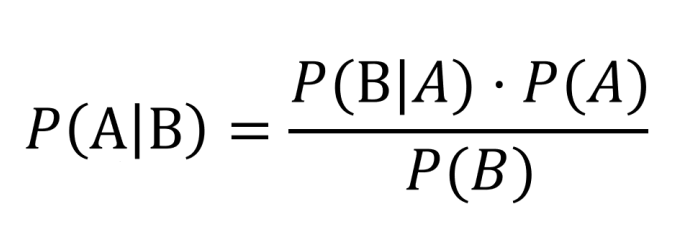

In [ ]:
cross_validate(logReg,X_train,y_train,cv=4)

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb.score(X_test,y_test)

0.6989278834073206

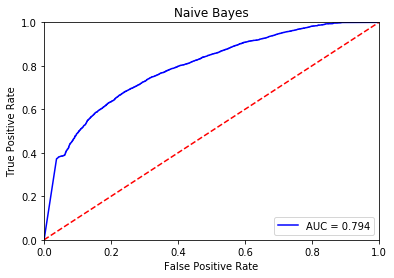

In [26]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thrs = roc_curve(y_test,preds)
roc_auc = auc(fpr, tpr)
plt.title('Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
f1_score(y_test,gnb.predict(X_test),average='weighted')

0.7037871771164572

## Modelos Não-Lineares

### Árvore de Decisão
O modelo de árvore de decisão consistem em achar as separações (splits) mais eficientes para gerar uma árvore que indicará qual categoria cada entrada pertence.

A ideia é começar com um nó Raíz que indica todo o Set de entrada, então observa de todas as colunas, qual a que contém maior 'quantidade de informação', e cria uma separação em tal coluna. Assim repetindo considerando sempre atributos nunca utilizados para uma separação antes.

O resultado é uma árvore que indica, assumindo os atributos da entrada, um caminho que leva à classificação
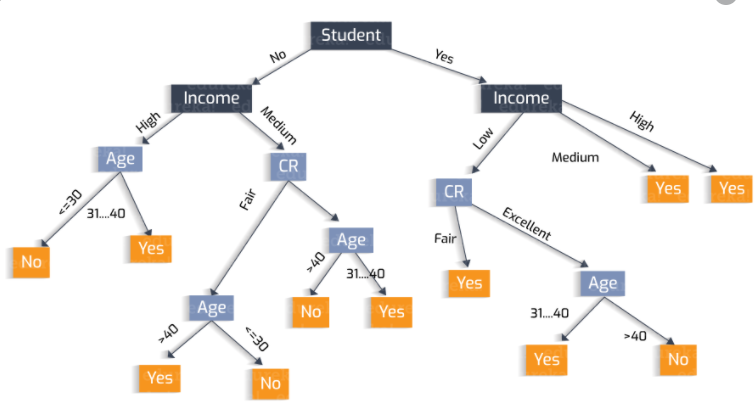

In [28]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier().fit(X_train, y_train)
DecisionTree.score(X_test,y_test)

0.8607086020604741

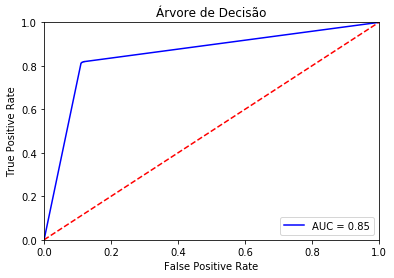

In [29]:
probs = DecisionTree.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thrs = roc_curve(y_test,preds)
roc_auc = auc(fpr, tpr)
plt.title('Árvore de Decisão')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
f1_score(y_test,DecisionTree.predict(X_test),average='weighted')

0.8606928552740856

### Random Forest
É um modelo do estilo ensemble, ou seja, uma aglomeração de outros modelos, no caso Árvores de Decisões.
Existem diferentes maneiras de implementar e usar algoritmos da família da Random Forest, como por exemplo simplesmente tomar uma média de cada árvore da floresta, e tomar como resultado, ou algo mais complexo.

Em geral árvores muito profundas tendem à Overfittar os conjuntos de treino, RandomForest é uma maneira de diluir os viéses de cada árvore de decisão, com o objetivo de reduzir a variância

In [22]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier().fit(X_train, y_train)
RandomForest.score(X_test,y_test)

C:\Users\Filipe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8862132506910126

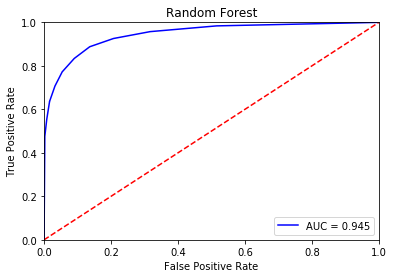

In [96]:
probs = RandomForest.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thrs = roc_curve(y_test,preds)
roc_auc = auc(fpr, tpr)
plt.title('Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
f1_score(y_test,RandomForest.predict(X_test),average='weighted')

0.8793191966988471

### Gradient Boosting
Também é um modelo do estilo ensemble.

É uma maneira iterativa de combinar e melhorar outros modelos mais fracos em um mais poderoso (Boosting), 
Tomamos primeiro um modelo simples, e medimos como ele performou comparando com o valor real do resultado (uma maneira simples de ver a performance é utilizando o erro médio quadrático do previsto com o real.
Então é criado um outro modelo que tenta gerar um h() tal que F_m+1(x)= F_m(x) + h_m(x) = y 
Assim a cada iteração o erro é minimizado e temos um modelo mais poderoso que o anterior

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting = GradientBoostingClassifier().fit(X_train, y_train)
GradientBoosting.score(X_test,y_test)

0.8490242063824441

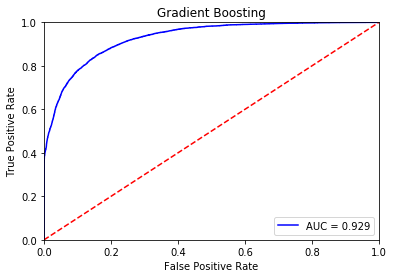

In [102]:
probs = GradientBoosting.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thrs = roc_curve(y_test,preds)
roc_auc = auc(fpr, tpr)
plt.title('Gradient Boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [103]:
f1_score(y_test,GradientBoosting.predict(X_test),average='weighted')

0.8512913017627292

In [ ]:
# from sklearn.svm import SVC
# SVM = SVC(gamma="auto").fit(X_train, y_train)
# SVM.score(X_test,y_test)

## Redes Neurais

Utilizarei Redes Neurais Feed-Foward para criar um modelo de predição.
Tal modelo consiste em nós (neurônios) conectados entre si, cada nó recebe uma série de valores de input de conexões com outros nós (a série de atributos da amostra na primeira camada), possui uma função interna que dependendo dos inputs retorna um valor que será seu output, que é multiplicado por um valor de peso da conexão e é propagado para os neurônios nas camadas posteriores.

Assumindo uma rede neural treinada, ao receber um vetor com os atributos na primeira camada, o simples ato de propagar para frente os valores até a camada final, que possui só um nó, irá gerar o resultado. Por exemplo se o output final > 0,5, então 'is_canceled'=True.

Para alcançar tal estado usamos do método de Backpropagation. Simplesmente, para nossa base de dados de treino (X_train), fazemos o processo de propagar para frente uma entrada numa árvore com os pesos aleatórios, e vemos o erro médio quadrático da saida com o seu real valor (y_train). Então utilizado de tal erro podemos 'caminhar para trás' na rede atualizando os pesos das conexões de maneira para minimizar o erro (descendo pelo gradiente).

Para cada uma das entradas, os pesos da rede são atualizados e temos uma rede melhor capaz de prever os resultados. Ficamos então de olho durante o desenvolvimento do treinamento para observar indícios de quando que a rede está começando a Overfit nos dados de treinamento (usando o subset de validação), e paramos de treinar na hora ótima.

O primeiro modelo criado foi logo grande, o que normalmente causa overfit nos dados

In [32]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import metrics

Using TensorFlow backend.


In [33]:
NN_model0 = Sequential()
n_cols = X_train.shape[1]
NN_model0.add(Dense(43,activation='relu',input_shape = (n_cols,)))
NN_model0.add(Dense(23,activation='relu',input_shape = (n_cols,)))
#model_0709.add(Dense(13,activation='relu',input_shape = (n_cols,)))
NN_model0.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=10)

In [34]:
NN_model0.compile(optimizer='adam',loss='mean_squared_error')
NN_model0.fit(X_train,y_train,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)
1 - NN_model0.evaluate(X_test,y_test)


Train on 76406 samples, validate on 19102 samples
Epoch 1/100
76406/76406 [==============================] - 2s 28us/step - loss: 0.1250 - val_loss: 0.1102
Epoch 2/100
76406/76406 [==============================] - 2s 25us/step - loss: 0.1076 - val_loss: 0.1034
Epoch 3/100
76406/76406 [==============================] - 2s 27us/step - loss: 0.1024 - val_loss: 0.0993
Epoch 4/100
76406/76406 [==============================] - 2s 26us/step - loss: 0.0986 - val_loss: 0.0986
Epoch 5/100
76406/76406 [==============================] - 2s 29us/step - loss: 0.0960 - val_loss: 0.0955
Epoch 6/100
76406/76406 [==============================] - 2s 25us/step - loss: 0.0939 - val_loss: 0.0953
Epoch 7/100
76406/76406 [==============================] - 2s 25us/step - loss: 0.0926 - val_loss: 0.0964
Epoch 8/100
76406/76406 [==============================] - 2s 25us/step - loss: 0.0913 - val_loss: 0.0944
Epoch 9/100
76406/76406 [==============================] - 2s 25us/step - loss: 0.0900 - val_loss: 0.

0.9098869384299901

C:\Users\Filipe\Anaconda3\lib\site-packages\keras\engine\sequential.py:248: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


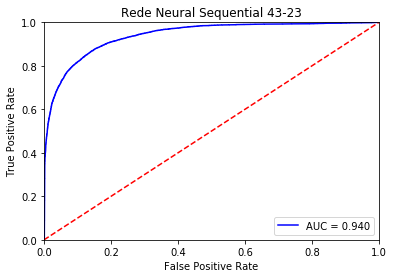

In [132]:
probs = NN_model0.predict_proba(X_test)
fpr,tpr,thrs = roc_curve(y_test,probs)
roc_auc = auc(fpr, tpr)
plt.title('Rede Neural Sequential 43-23')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

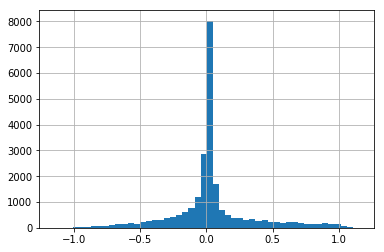

In [112]:
result = pd.DataFrame()
pred_y = pd.Series(data=NN_model0.predict(X_test)[:,0])
result['y_test'] = y_test.reset_index()['is_canceled']
result['pred_y'] = pred_y
result['dif'] = result['y_test'] - result['pred_y']
result['dif'].hist(bins=50)
# result

O melhor resultado usando os dados de teste até então, tentarei então um modelo um pouco maior e um um pouco menor para ver se conseguimos resultados ainda melhores

In [35]:
NN_model1 = Sequential()
n_cols = X_train.shape[1]
NN_model1.add(Dense(133,activation='relu',input_shape = (n_cols,)))
NN_model1.add(Dense(60,activation='relu',input_shape = (n_cols,)))
NN_model1.add(Dense(13,activation='relu',input_shape = (n_cols,)))
NN_model1.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=10)

In [36]:
NN_model1.compile(optimizer='adam',loss='mean_squared_error')
NN_model1.fit(X_train,y_train,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)
1 - NN_model1.evaluate(X_test,y_test)

Train on 76406 samples, validate on 19102 samples
Epoch 1/100
76406/76406 [==============================] - 2s 33us/step - loss: 0.1190 - val_loss: 0.1053
Epoch 2/100
76406/76406 [==============================] - 2s 32us/step - loss: 0.1044 - val_loss: 0.1019
Epoch 3/100
76406/76406 [==============================] - 2s 31us/step - loss: 0.0987 - val_loss: 0.0974
Epoch 4/100
76406/76406 [==============================] - 2s 30us/step - loss: 0.0950 - val_loss: 0.0954
Epoch 5/100
76406/76406 [==============================] - 2s 31us/step - loss: 0.0925 - val_loss: 0.0936
Epoch 6/100
76406/76406 [==============================] - 2s 30us/step - loss: 0.0905 - val_loss: 0.0921
Epoch 7/100
76406/76406 [==============================] - 2s 31us/step - loss: 0.0882 - val_loss: 0.0925
Epoch 8/100
76406/76406 [==============================] - 3s 33us/step - loss: 0.0863 - val_loss: 0.0914
Epoch 9/100
76406/76406 [==============================] - 2s 31us/step - loss: 0.0848 - val_loss: 0.0

0.9076574991651167

C:\Users\Filipe\Anaconda3\lib\site-packages\keras\engine\sequential.py:248: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


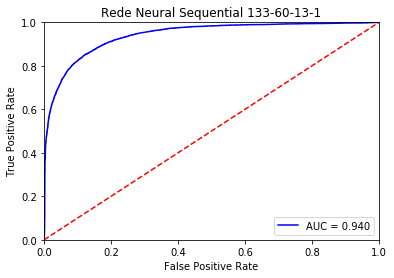

In [139]:
probs = NN_model1.predict_proba(X_test)
fpr,tpr,thrs = roc_curve(y_test,probs)
roc_auc = auc(fpr, tpr)
plt.title('Rede Neural Sequential 133-60-13-1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

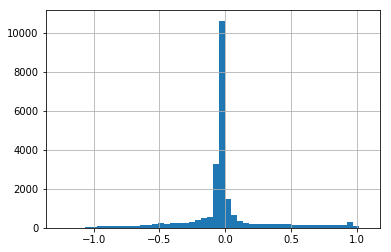

In [117]:
result = pd.DataFrame()
pred_y = pd.Series(data=NN_model1.predict(X_test)[:,0])
result['y_test'] = y_test.reset_index()['is_canceled']
result['pred_y'] = pred_y
result['dif'] = result['y_test'] - result['pred_y']
result['dif'].hist(bins=50)
# result

In [37]:
NN_model2 = Sequential()
n_cols = X_train.shape[1]
NN_model2.add(Dense(80,activation='relu',input_shape = (n_cols,)))
NN_model2.add(Dense(60,activation='relu',input_shape = (n_cols,)))
# NN_model2.add(Dense(3,activation='relu',input_shape = (n_cols,)))
NN_model2.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=10)

In [38]:
NN_model2.compile(optimizer='adam',loss='mean_squared_error')
NN_model2.fit(X_train,y_train,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)
1 - NN_model2.evaluate(X_test,y_test)

Train on 76406 samples, validate on 19102 samples
Epoch 1/100
76406/76406 [==============================] - 2s 28us/step - loss: 0.1218 - val_loss: 0.1079
Epoch 2/100
76406/76406 [==============================] - 2s 26us/step - loss: 0.1046 - val_loss: 0.1005
Epoch 3/100
76406/76406 [==============================] - 2s 29us/step - loss: 0.0994 - val_loss: 0.0972
Epoch 4/100
76406/76406 [==============================] - 2s 26us/step - loss: 0.0959 - val_loss: 0.0965
Epoch 5/100
76406/76406 [==============================] - 2s 27us/step - loss: 0.0933 - val_loss: 0.0938
Epoch 6/100
76406/76406 [==============================] - 2s 28us/step - loss: 0.0912 - val_loss: 0.0950
Epoch 7/100
76406/76406 [==============================] - 2s 29us/step - loss: 0.0895 - val_loss: 0.0930
Epoch 8/100
76406/76406 [==============================] - 2s 27us/step - loss: 0.0881 - val_loss: 0.0932
Epoch 9/100
76406/76406 [==============================] - 2s 29us/step - loss: 0.0867 - val_loss: 0.0

0.9072449196996536

C:\Users\Filipe\Anaconda3\lib\site-packages\keras\engine\sequential.py:248: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


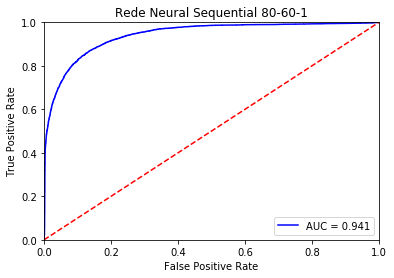

In [138]:
probs = NN_model2.predict_proba(X_test)
fpr,tpr,thrs = roc_curve(y_test,probs)
roc_auc = auc(fpr, tpr)
plt.title('Rede Neural Sequential 80-60-1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

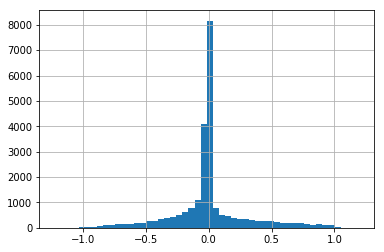

In [121]:
result = pd.DataFrame()
pred_y = pd.Series(data=NN_model2.predict(X_test)[:,0])
result['y_test'] = y_test.reset_index()['is_canceled']
result['pred_y'] = pred_y
result['dif'] = result['y_test'] - result['pred_y']
result['dif'].hist(bins=50)
# result

In [46]:
x = np.array([1, 2, 3, 4, 5])
squarer = lambda t: 1 if t>0 else 0
vfunc = np.vectorize(squarer)
vfunc(x)


array([1, 1, 1, 1, 1])

In [136]:
# f1_score(y_test,vfunc(NN_model0.predict(X_test)),average='weighted')
# f1_score(y_test,vfunc(NN_model1.predict(X_test)),average='weighted')
f1_score(y_test,vfunc(NN_model2.predict(X_test)),average='weighted')


0.8727747911981815

In [129]:
vfunc(NN_model2.predict(X_test))

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [25]:
from sklearn.svm import SVC
SVM = SVC(gamma="auto",max_iter=10000,probability='true').fit(X_train, y_train)
SVM.score(X_test,y_test)

C:\Users\Filipe\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.5582125806181423

In [26]:
probs = SVM.predict_proba(X_test)
fpr,tpr,thrs = roc_curve(y_test,probs)
roc_auc = auc(fpr, tpr)
plt.title('SVM gamma=auto max_iter=10000')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AttributeError: predict_proba is not available when  probability=False

In [28]:
f1_score(y_test,SVM.predict(X_test),average='weighted')

0.5331530541262972

In [ ]:
from sklearn.svm import SVC
SVM = SVC(gamma="auto",max_iter=1000,probability=1).fit(X_train, y_train)
SVM.score(X_test,y_test)

In [ ]:
from sklearn.svm import SVC
SVM = SVC(gamma="auto",c=0,1,,max_iter=1000,probability=1).fit(X_train, y_train)
SVM.score(X_test,y_test)

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForest,X_test,y_test,cv=5)

array([0.85806992, 0.85469012, 0.86157068, 0.8565445 , 0.85612565])

In [ ]:
def scoring(x):
    return f1_score(y_test,vfunc(SVM.predict(x)),average='weighted')

In [39]:
cv_logReg = cross_val_score(logReg,X_test,y_test,cv=5)

C:\Users\Filipe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Filipe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Filipe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Filipe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Filipe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [40]:
cv_GaussianNB = cross_val_score(GaussianNB,X_test,y_test,cv=5)

TypeError: get_params() missing 1 required positional argument: 'self'

In [41]:
cv_DecisionTree = cross_val_score(DecisionTree,X_test,y_test,cv=5)

In [42]:
cv_RandomForest = cross_val_score(RandomForest,X_test,y_test,cv=5)

In [43]:
cv_GradientBoosting = cross_val_score(GradientBoosting,X_test,y_test,cv=5)

In [50]:
sum(cv_logReg)/len(cv_logReg)

0.8131334388227106

In [51]:
sum(cv_GaussianNB)/len(cv_GaussianNB)

NameError: name 'cv_GaussianNB' is not defined

In [52]:
sum(cv_DecisionTree)/len(cv_DecisionTree)

0.8256550085472651

In [53]:
sum(cv_RandomForest)/len(cv_RandomForest)

0.8578186983996765

In [54]:
sum(cv_GradientBoosting)/len(cv_GradientBoosting)

0.8471396134195667